# 01_EDA - AnalizaWstępna analiza danych (EDA)

## Przewidywanie wystąpienia cukszycy

Cel: analiza danych o ryzyku cukrzycy

Liczba obserwacji: 100000

Liczba cech: 31

Cechy numeryczne: 24

Cechy kategoryczne: 7

Docelowa: diagnosed_diabetes (binarny: tak/nie)

## Dane/Importy

### Import potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

### Wczytanie danych

In [2]:
df = pd.read_csv(r"diabetes_dataset.csv")

### Ustawienia wykresów

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.set_option('display.max_columns', None)

## Wstępna analiza danych

### Podstawowe informacje o zbiorze

In [4]:
print("=== Podstawowe informacje o danych ===")
print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}\n")

print("=== Typy kolumn ===")
print(df.dtypes.value_counts(), "\n")

print("=== Przykładowe wiersze ===")
display(df.head())

=== Podstawowe informacje o danych ===
Liczba wierszy: 100000
Liczba kolumn: 31

=== Typy kolumn ===
int64      16
float64     8
object      7
Name: count, dtype: int64 

=== Przykładowe wiersze ===


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### Sprawdzenie brakujących wartości

In [5]:
print("=== Brakujące wartości w zbiorze ===")
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
if len(missing) == 0:
    print("Brak brakujących wartości 🎉")
else:
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({"Liczba braków": missing, "% braków": missing_percent})
    display(missing_df)

    # Wizualizacja braków
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Mapa brakujących wartości")
    plt.show()

=== Brakujące wartości w zbiorze ===
Brak brakujących wartości 🎉


### Sprawdzenie duplikatów

In [6]:
duplicate_values = df.duplicated().sum()
if duplicate_values == 0:
    print("Brak duplikatów 🎉")
else:
    print("Liczba duplikatów: ", duplicate_values)

Brak duplikatów 🎉


### Statystyki opisowe

In [7]:
print("=== Statystyki opisowe (numeryczne) ===")
display(df.describe())

print("=== Statystyki opisowe (kategoryczne) ===")
display(df.describe(include='object'))

=== Statystyki opisowe (numeryczne) ===


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,0.890000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,1.060000,179.000000,110.00000,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


=== Statystyki opisowe (kategoryczne) ===


,gender,ethnicity,education_level,income_level,employment_status,smoking_status,diabetes_stage
count,100000,100000,100000,100000,100000,100000,100000
unique,3,5,4,5,4,3,5
top,Female,White,Highschool,Middle,Employed,Never,Type 2
freq,50216,44997,44891,35152,60175,59813,59774


### Analiza zmiennej docelowej (targetu)

In [8]:
target = "diagnosed_diabetes"
print(f"=== Analiza targetu: {target} ===")
print(df[target].value_counts())
print("\nProcentowy rozkład klas:")
print(df[target].value_counts(normalize=True) * 100)

=== Analiza targetu: diagnosed_diabetes ===
diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

Procentowy rozkład klas:
diagnosed_diabetes
1    59.998
0    40.002
Name: proportion, dtype: float64


### Wykres rozkładu klas (future-proof)

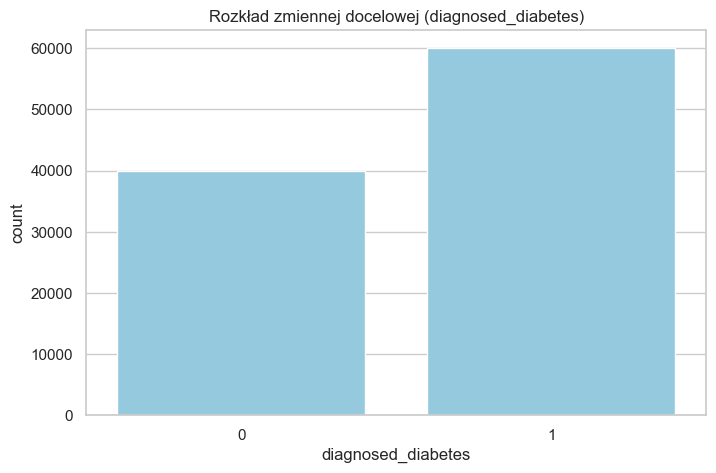

In [9]:
sns.countplot(x=target, data=df, color="skyblue")
plt.title("Rozkład zmiennej docelowej (diagnosed_diabetes)")
plt.show()

### Rozkłady cech numerycznych

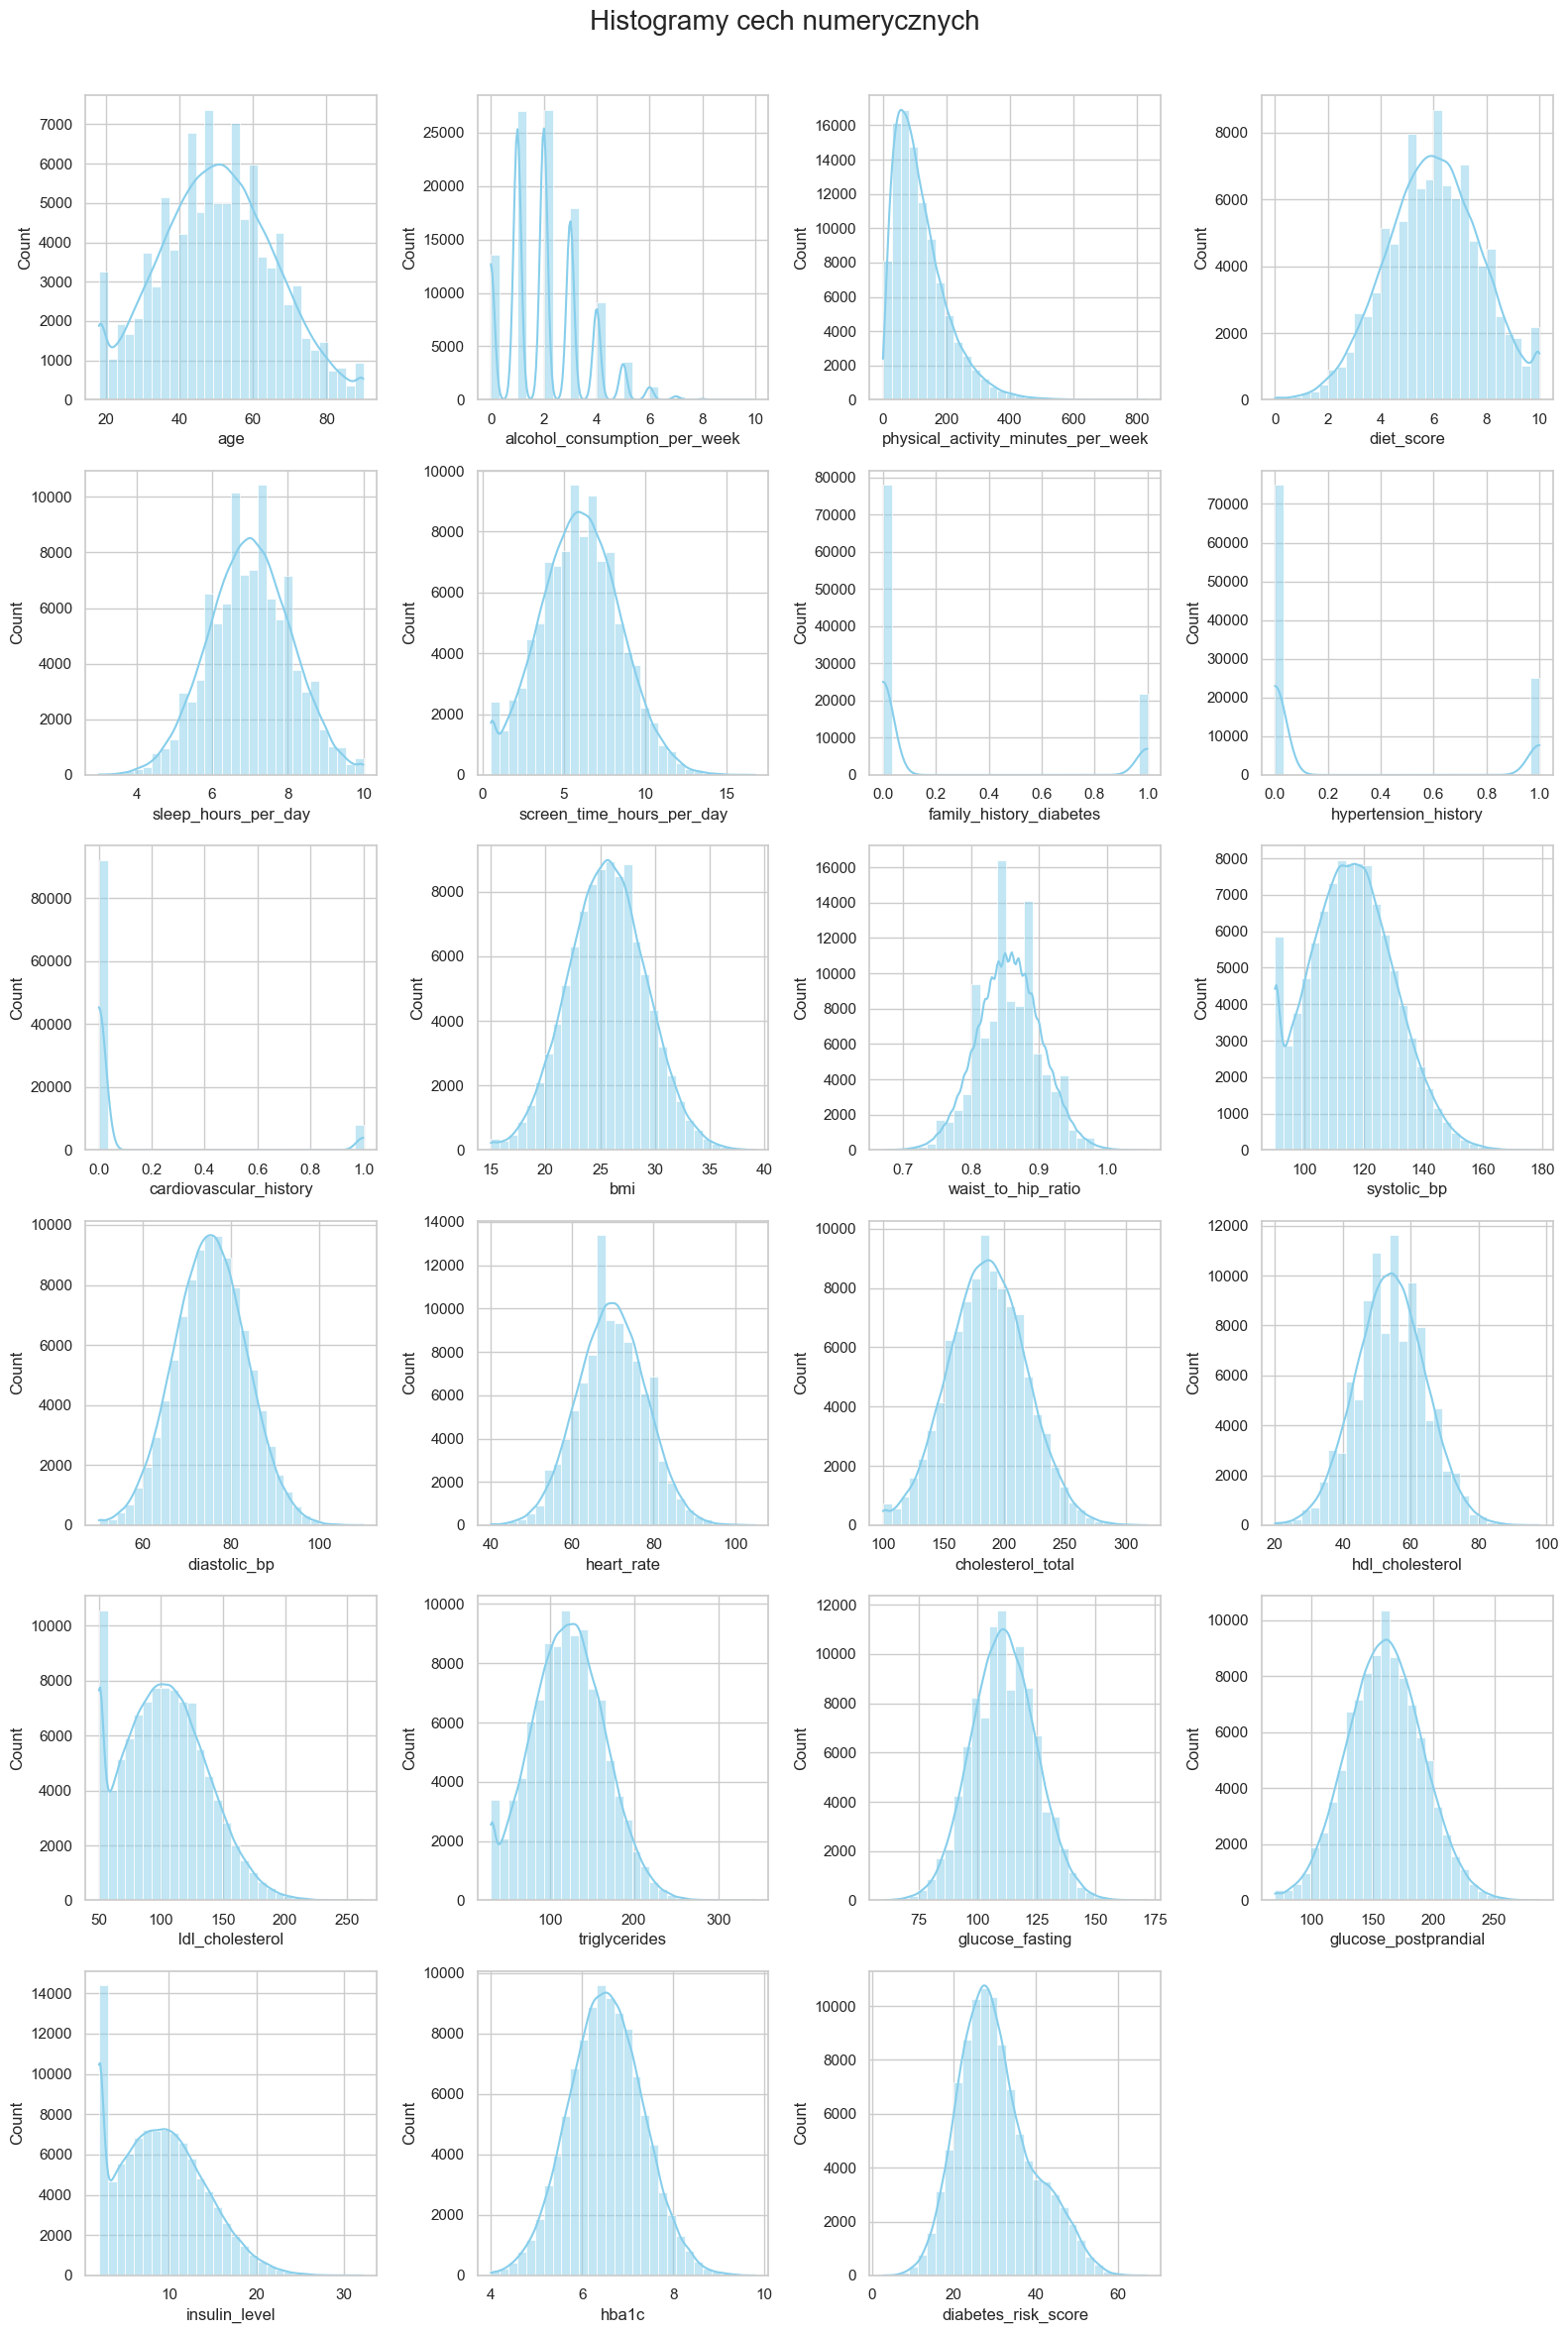

In [10]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Histogramy dla cech numerycznych
def plot_numeric_distributions(df, cols, nrows, ncols, title):
    cols = [col for col in cols if col != target]
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, nrows * 4))
    axs = axs.flatten() 
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], bins=30, kde=True, ax=axs[i], color='skyblue', legend=False)

    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
        
    fig.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

plot_numeric_distributions(df, num_cols, 6, 4, "Histogramy cech numerycznych")

### Zależność wybranych cech numerycznych od targetu

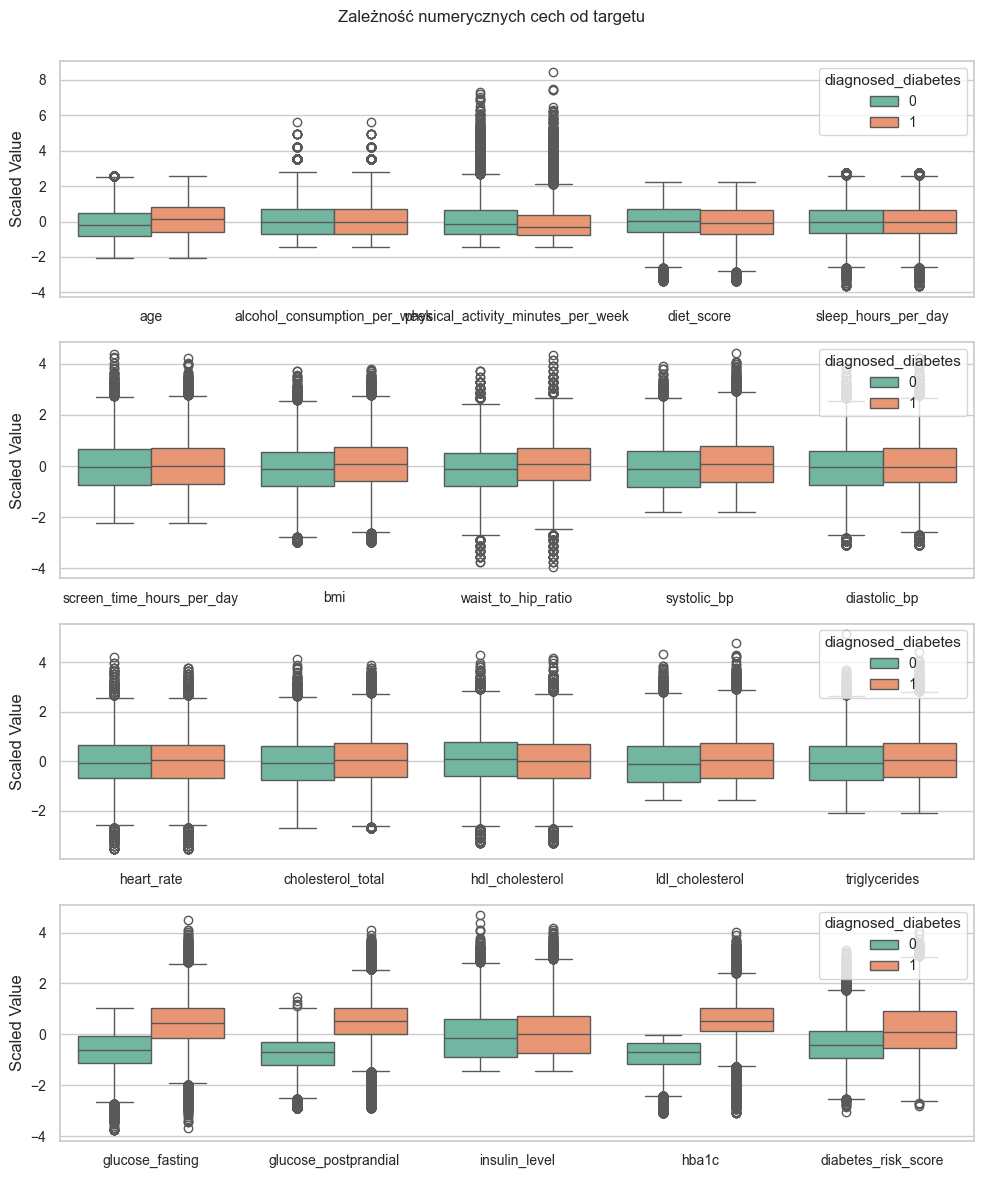

In [11]:
def plot_boxplots_by_target(df, cols, nrows, ncols, target): 
    exclude = ["family_history_diabetes", "hypertension_history", "cardiovascular_history", target]

    box_cols = [col for col in cols if col not in exclude]
    
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(df[box_cols])
    df_scaled = df.copy()
    df_scaled[box_cols] = scaled_array
    
    grouped_cols = [box_cols[i:i + ncols] for i in range(0, len(box_cols), ncols)]
    fig, axes = plt.subplots(nrows, 1, figsize=(2 * ncols, 3 * nrows))
    
    if nrows == 1:
        axes = [axes]
    
    for i, group in enumerate(grouped_cols):
        if i >= nrows:
            break
    
        df_melted = df_scaled.melt(id_vars=target, value_vars=group, var_name='Feature', value_name='Value')
        sns.boxplot(x='Feature', y='Value', hue=target, data=df_melted, ax=axes[i], palette="Set2")
        
        axes[i].tick_params(axis='x', labelsize=10, rotation=0)
        axes[i].tick_params(axis='y', labelsize=10, rotation=0)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Scaled Value", fontsize=12)
        axes[i].legend(title=target, loc='upper right', fontsize=10, title_fontsize=11)

    fig.suptitle("Zależność numerycznych cech od targetu", fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_boxplots_by_target(df, num_cols, 4, 5, target)

### Rozkłady cech kategorycznych

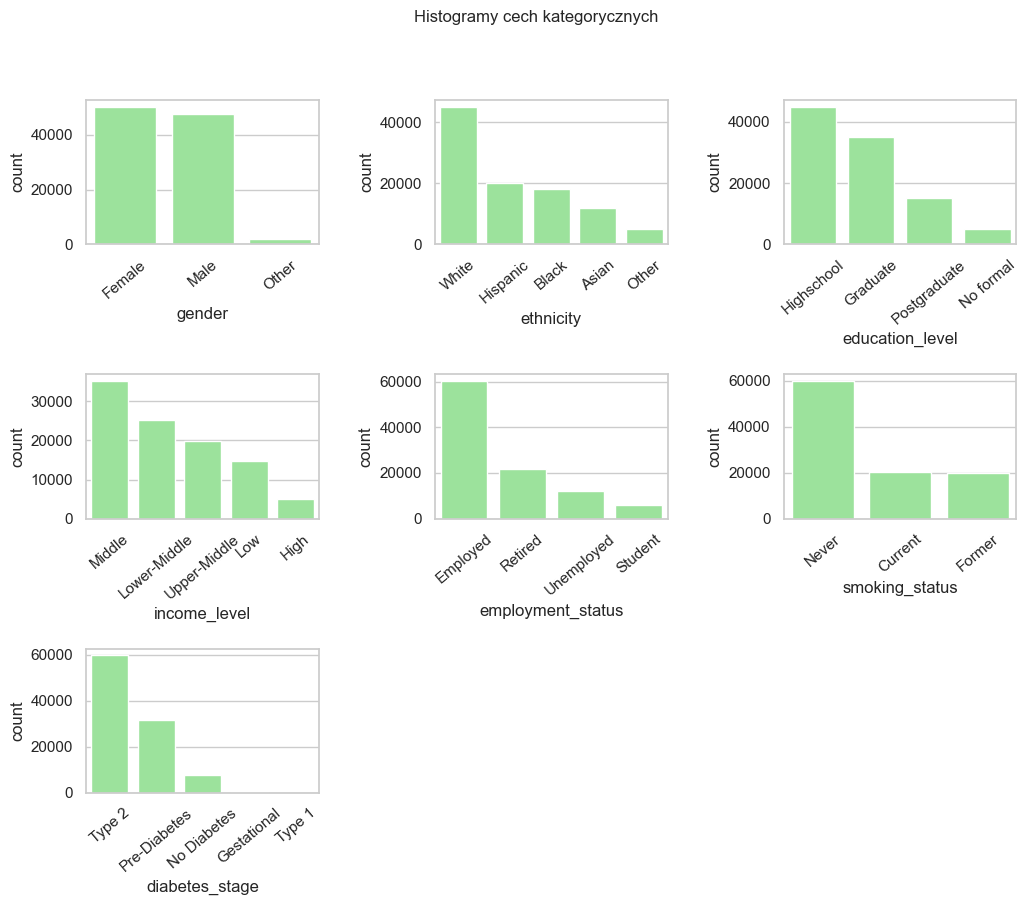

In [12]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

def plot_categorical_distributions(df, cols, nrows, ncols, title):
    fig, axs = plt.subplots(nrows, ncols, figsize=(12, nrows * 3))
    axs = axs.flatten() 
    plt.subplots_adjust(hspace=0.9, wspace=0.5)
    
    for i, col in enumerate(cols):
        sns.countplot(
            x=col, data=df, ax=axs[i],
            color='lightgreen',
            order=df[col].value_counts().index
        )
        axs[i].tick_params(axis="x", rotation=40)
        
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
        
    fig.suptitle(title, fontsize=12)
    plt.show()

plot_categorical_distributions(df, cat_cols, 3, 3, "Histogramy cech kategorycznych")

### Korelacje między cechami numerycznymi

=== Analiza korelacji między cechami numerycznymi ===

🔹 Wysoka korelacja (>0.7):
family_history_diabetes ↔ diabetes_risk_score: 0.73
bmi ↔ waist_to_hip_ratio: 0.77
cholesterol_total ↔ ldl_cholesterol: 0.91
glucose_fasting ↔ hba1c: 0.70
glucose_postprandial ↔ hba1c: 0.93

🔸 Niska korelacja z diagnosed_diabetes (<0.1):
hdl_cholesterol: -0.05
diet_score: -0.04
sleep_hours_per_day: -0.00
alcohol_consumption_per_week: 0.00
screen_time_hours_per_day: 0.02
heart_rate: 0.02
hypertension_history: 0.03
cardiovascular_history: 0.03
diastolic_bp: 0.04
triglycerides: 0.06
insulin_level: 0.06
cholesterol_total: 0.06
ldl_cholesterol: 0.07
waist_to_hip_ratio: 0.08
systolic_bp: 0.10
bmi: 0.10


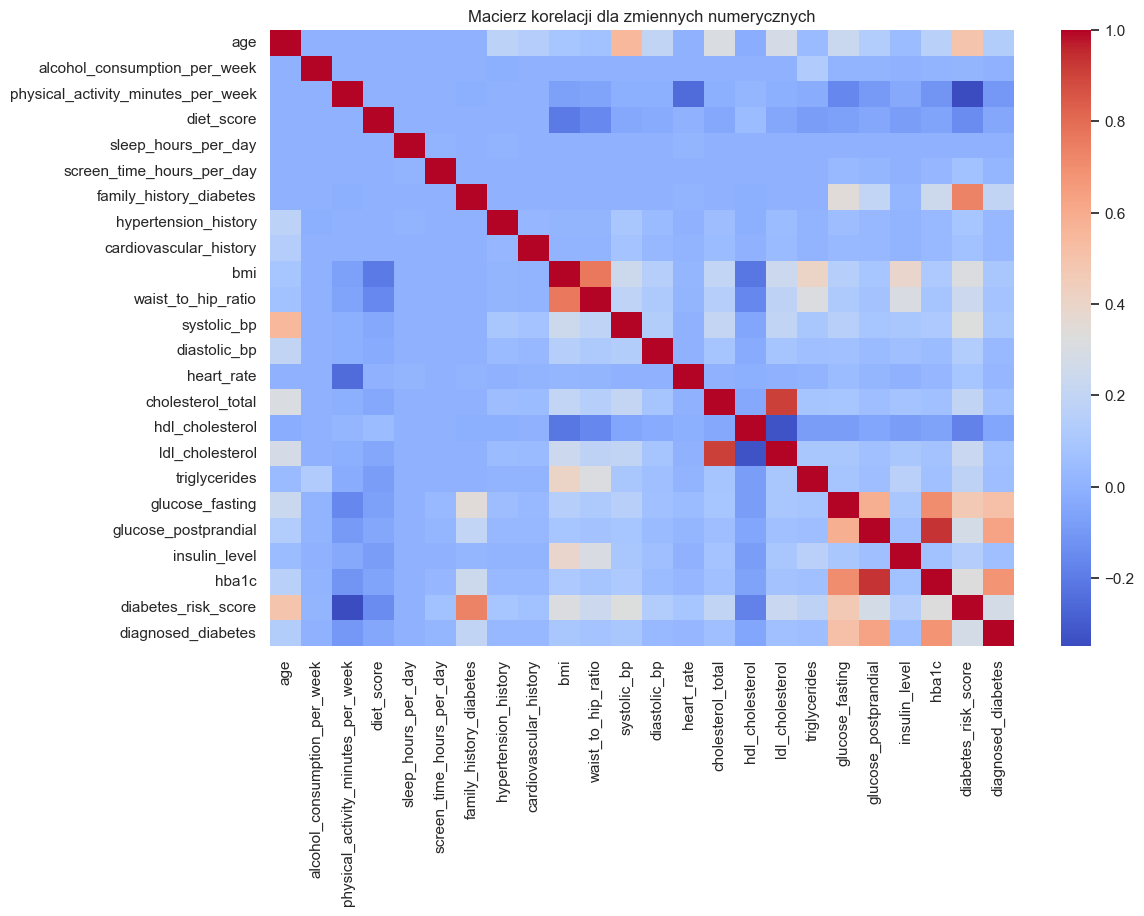

In [13]:
print("=== Analiza korelacji między cechami numerycznymi ===")

def displayCorrMatrix(df):
    
    num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    corr = df[num_cols].corr()
    high_corr = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.7:
                high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

    print("\n🔹 Wysoka korelacja (>0.7):")
    for col1, col2, corr_value in high_corr:
        print(f"{col1} ↔ {col2}: {corr_value:.2f}")

    low_corr = corr[target].drop(target)
    low_corr = low_corr[low_corr.abs() < 0.1].sort_values()

    print("\n🔸 Niska korelacja z diagnosed_diabetes (<0.1):")
    for col, corr_value in low_corr.items():
        print(f"{col}: {corr_value:.2f}")

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, cmap="coolwarm", annot=False)
    plt.title("Macierz korelacji dla zmiennych numerycznych")
    plt.show()

displayCorrMatrix(df)

## Podsumowanie

### Podsumowanie EDA

##### Na podstawie przeprowadzonej analizy danych można zauważyć kilka istotnych kwestii:
1. Zmienna docelowa diagnosed_diabetes jest niezrównoważona — wartość 0 występuje znacznie częściej niż 1. Może to wpłynąć na działanie modeli klasyfikacyjnych i wymagać zastosowania technik radzenia sobie z niezrównoważonymi danymi (np. oversampling lub ważenie klas). 

2. Obecna liczba rekordów wynosi 100000, co może spowalniać proces eksploracji i trenowania modeli. Zaleca się zmniejszenie zbioru do około 10000 wierszy, przy zachowaniu reprezentatywności dla wszystkich klas.

3. Na podstawie analizy korelacji można wyróżnić dwie grupy kolumn: 
    
    * Wysoka korelacja (>0,7) – te kolumny są silnie powiązane z innymi i mogą wprowadzać redundancję w modelu. Zaleca się ich usunięcie lub przemyślenie: family_history_diabetes, bmi, cholesterol_total, glucose_fasting, glucose_postprandial.

    * Wysoka korelacja z celem (diagnosed_diabetes) – zmienna diabetes_stage ma korelację 0,96 z celem, co czyni ją bardzo silnym predyktorem. Można ją wykorzystać w modelu predykcyjnym lub traktować jako wskaźnik ryzyka.

    * Niska korelacja z celem (diagnosed_diabetes <0,1) – te kolumny mają minimalny wpływ na zmienną docelową i można rozważyć ich pominięcie w modelu: sleep_hours_per_day, alcohol_consumption_per_week, screen_time_hours_per_day, heart_rate, hypertension_history, cardiovascular_history


##  Inżynieria cech

### Usuwanie kolumn z wysoką korelacją

In [14]:
df_prepared = df.copy()

cols_to_drop = [
    "family_history_diabetes",
    "bmi",
    "cholesterol_total",
    "glucose_fasting",
    "glucose_postprandial",
    "diabetes_stage"
]

df_prepared.drop(columns=cols_to_drop, inplace=True)


### Usuwanie wartosci odstających

In [15]:
def remove_outliers_iqr(df, cols, k=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

num_cols = df_prepared.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_cols.remove("diagnosed_diabetes")

df_prepared = remove_outliers_iqr(df_prepared, num_cols)

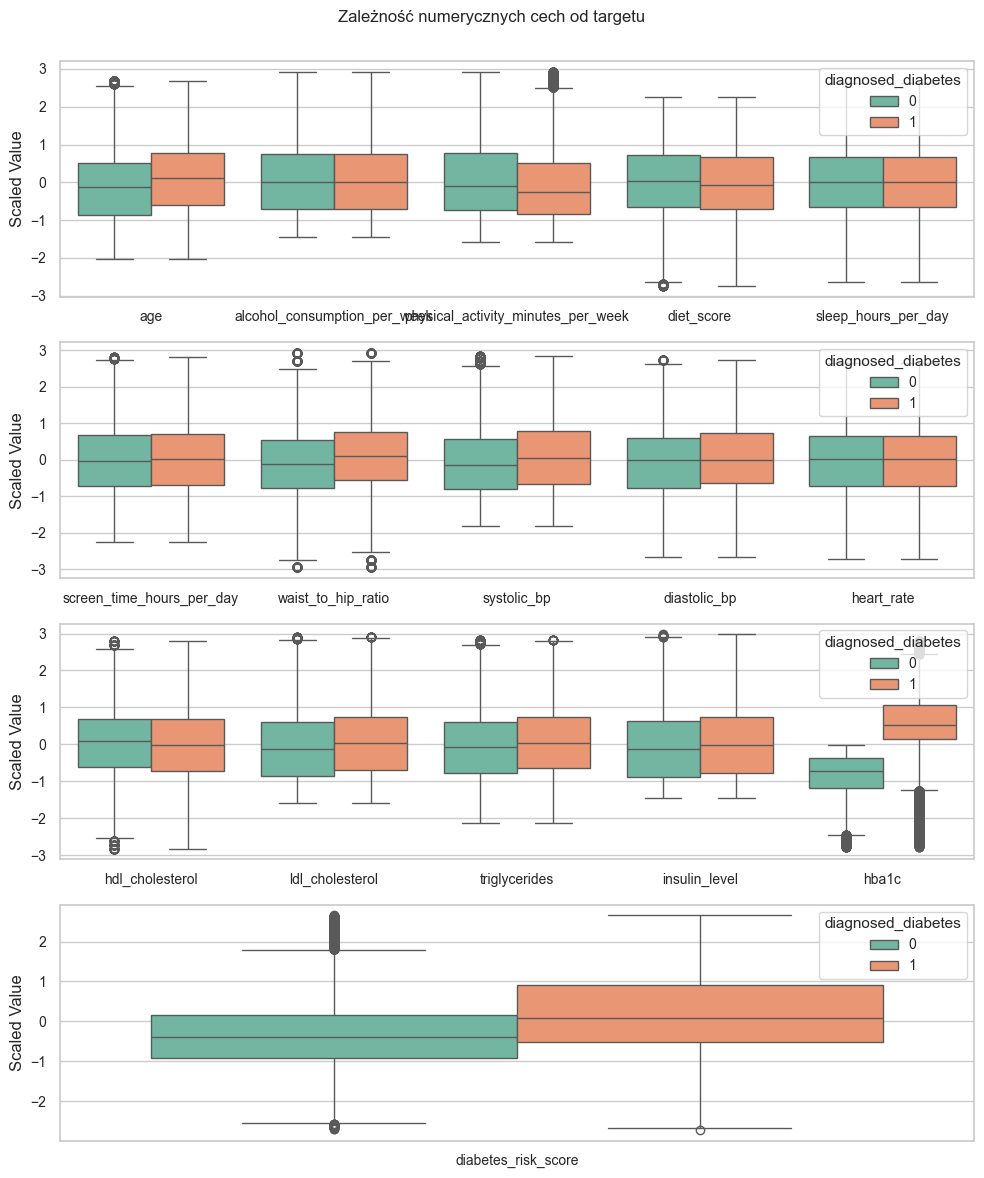

In [16]:
plot_boxplots_by_target(df_prepared, num_cols, 4, 5, target)

### Skrócenie liczby wierszy do 10 000

In [17]:
# if len(df_prepared) > 10000:
#     df_prepared = df_prepared.sample(n=10000, random_state=42) 
# else:
#     df_prepared = df_prepared.copy()

### Skalowanie danych

#### Standaryzacja

In [18]:
scaler = StandardScaler()
num_cols = df_prepared.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("diagnosed_diabetes")

df_prepared[num_cols] = scaler.fit_transform(df_prepared[num_cols])

#### Label Encoding 

In [19]:
# One-Hot Encoding (person_education, person_home_ownership, loan_intent)
cat_cols = df_prepared.select_dtypes(include=['object', 'category']).columns

print("Encoding categories: ", cat_cols)

df_prepared = pd.get_dummies(df_prepared, columns=cat_cols, drop_first=True)
df_prepared = df_prepared.astype(float)

Encoding categories:  Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status'],
      dtype='object')


In [20]:
df_prepared.head(10)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,hypertension_history,cardiovascular_history,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,hdl_cholesterol,ldl_cholesterol,triglycerides,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
0,0.582920,-1.439996,1.498336,-0.185459,0.849004,0.795161,-0.570911,0.0,0.751438,1.350962,0.360307,-0.225746,-1.316638,1.776348,0.571269,-0.538673,2.115277,-0.041006,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.070949,-0.712519,0.464586,0.384537,-0.471241,1.123920,-0.570911,0.0,-1.207038,0.992705,0.109006,-0.350416,0.086051,-1.590201,-2.124606,-1.436257,-1.114741,-0.808223,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.201723,-0.712519,-0.023575,0.669536,0.377488,-0.396590,-0.570911,0.0,-1.642255,-1.658392,-1.021850,-0.350416,-0.214526,0.705173,0.922905,0.774764,0.873937,-0.750100,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,-0.201723,0.014958,0.191790,1.695529,-0.754151,-0.232211,-0.570911,0.0,-0.118996,-1.443439,0.737259,-1.597111,0.687203,0.521543,1.368310,-0.042531,-0.608072,-0.750100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,1.694498,-1.439996,-0.827603,1.809528,0.754701,0.836256,1.751586,0.0,0.533829,0.992705,0.234657,1.394958,-0.815678,1.806953,0.805693,0.239508,-1.608744,0.714586,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,0.648307,0.742435,-0.353800,1.239532,-1.602880,0.589687,-0.570911,0.0,-0.989430,0.634449,0.737259,0.023593,-0.214526,0.031863,-0.389869,-0.923646,-1.925412,0.005492,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,-0.397884,-0.712519,0.105644,0.840535,-1.697183,-0.232211,-0.570911,0.0,0.098613,-0.440321,1.239862,-0.475085,-1.016062,-0.702657,1.438637,1.132974,1.051271,-0.540859,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11,-0.397884,-0.712519,0.809169,0.669536,-0.094028,-0.355495,1.751586,0.0,-2.077472,0.276192,-0.770548,-0.475085,0.486819,-1.253547,-1.679201,0.813879,1.127271,-1.331325,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12,0.321372,0.014958,-1.401909,0.384537,-0.094028,0.712971,-0.570911,0.0,1.839480,0.347844,1.114211,1.145619,-1.416830,0.490938,2.376333,1.828807,0.468601,0.877328,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14,-1.771009,0.742435,-0.081005,0.555536,2.074946,-1.670531,-0.570911,0.0,1.186655,-0.153715,-0.770548,-0.973763,-0.715486,-0.059952,0.243075,1.565296,-0.798073,-1.029088,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



🔹 Wysoka korelacja (>0.7):

🔸 Niska korelacja z diagnosed_diabetes (<0.1):
physical_activity_minutes_per_week: -0.08
hdl_cholesterol: -0.04
diet_score: -0.04
income_level_Middle: -0.01
education_level_Postgraduate: -0.01
employment_status_Retired: -0.01
ethnicity_Hispanic: -0.00
employment_status_Student: -0.00
smoking_status_Never: -0.00
income_level_Low: -0.00
income_level_Upper-Middle: -0.00
sleep_hours_per_day: -0.00
education_level_Highschool: 0.00
ethnicity_Other: 0.00
ethnicity_Black: 0.00
employment_status_Unemployed: 0.00
smoking_status_Former: 0.00
ethnicity_White: 0.00
gender_Other: 0.00
education_level_No formal: 0.00
gender_Male: 0.00
alcohol_consumption_per_week: 0.00
income_level_Lower-Middle: 0.01
heart_rate: 0.02
screen_time_hours_per_day: 0.02
hypertension_history: 0.02
diastolic_bp: 0.03
triglycerides: 0.05
insulin_level: 0.05
ldl_cholesterol: 0.06
waist_to_hip_ratio: 0.07
systolic_bp: 0.09


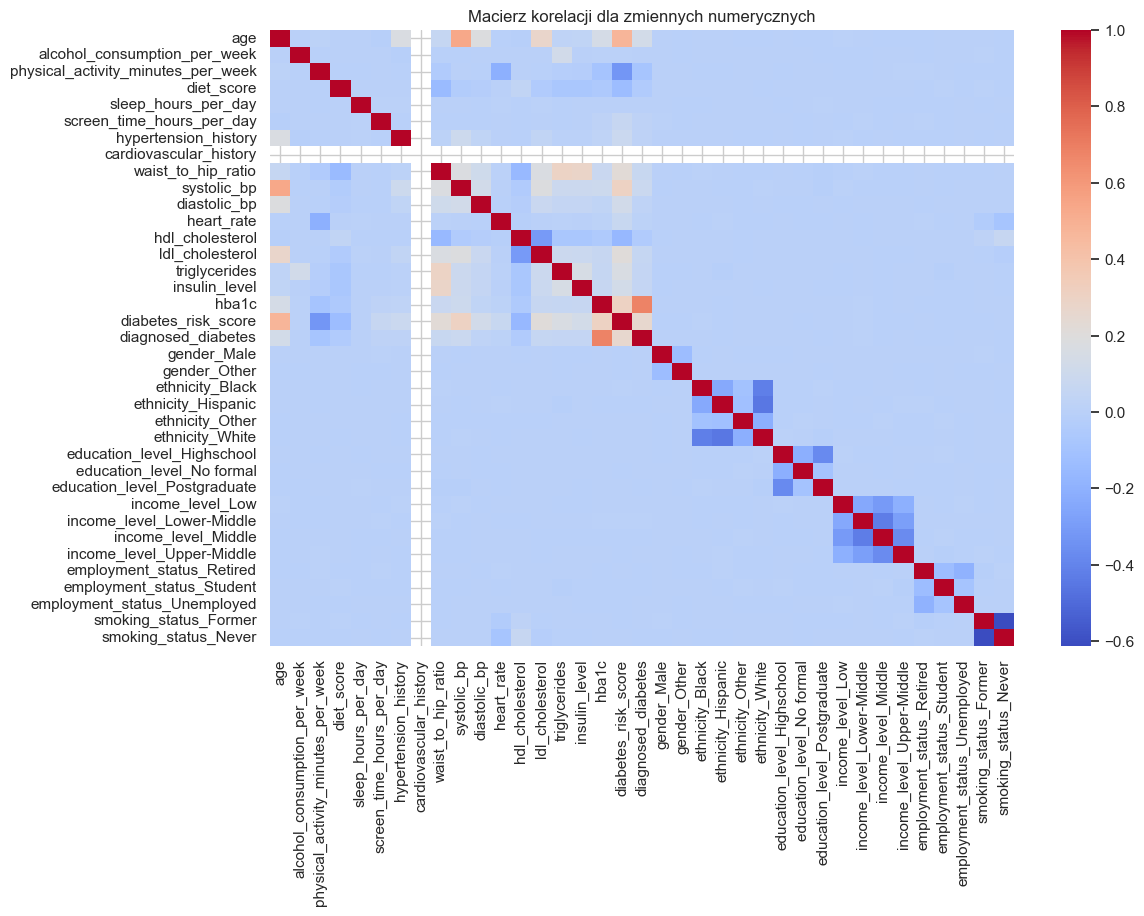

In [21]:
displayCorrMatrix(df_prepared)

### Podział na cechy i etykiety (X, y)

In [22]:
X = df_prepared.drop(['diagnosed_diabetes'], axis=1) 
y = df_prepared['diagnosed_diabetes'] 

### Podział danych trening/test 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print("Wybraliśmy ROC-AUC ponieważ:")
print(" Mierzy, jak dobrze model rozróżnia chorych od zdrowych.")
print(" Działa dobrze przy niezbalansowanych klasach (np. mniej chorych niż zdrowych).")

Wybraliśmy ROC-AUC ponieważ:
 Mierzy, jak dobrze model rozróżnia chorych od zdrowych.
 Działa dobrze przy niezbalansowanych klasach (np. mniej chorych niż zdrowych).


### Sprawdzianie Feature Importance za pomocą klasyfikatora RandomForest

=== Cechy z FI < 0.01 ===
alcohol_consumption_per_week    0.009466
gender_Male                     0.003258
education_level_Highschool      0.003197
smoking_status_Never            0.003024
ethnicity_White                 0.002994
income_level_Middle             0.002892
hypertension_history            0.002777
employment_status_Retired       0.002718
income_level_Lower-Middle       0.002637
ethnicity_Hispanic              0.002587
income_level_Upper-Middle       0.002553
smoking_status_Former           0.002479
ethnicity_Black                 0.002396
income_level_Low                0.002246
employment_status_Unemployed    0.002239
education_level_Postgraduate    0.002224
employment_status_Student       0.001606
education_level_No formal       0.001466
ethnicity_Other                 0.001416
gender_Other                    0.000906
cardiovascular_history          0.000000
dtype: float64


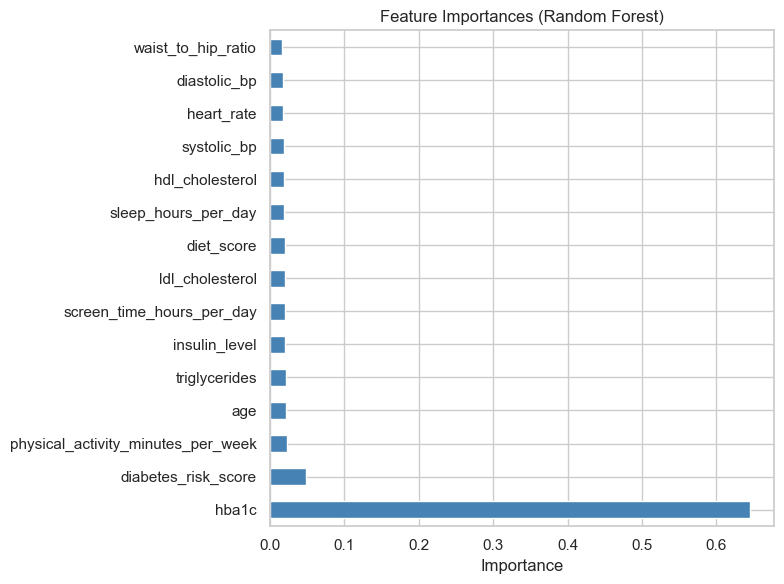

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    n_jobs=-1,
    random_state=42
).fit(X_train, y_train)

threshhold = 0.01

imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
imp_high_importance = imp[imp >= threshhold].sort_values(ascending=False)

imp_low_importance = imp[imp < threshhold]

print(f"=== Cechy z FI < {threshhold} ===")
print(imp_low_importance)

plt.figure(figsize=(8, 6))
imp_high_importance.tail(50).plot(kind='barh', color='steelblue')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

### Usunięcie cech z feature importance mniejszych niz 0.01

In [26]:
df_importance = df_prepared.drop(columns=imp_low_importance.index)

print("=== Podstawowe informacje o danych ===")
print(f"Liczba wierszy: {df_importance.shape[0]}")
print(f"Liczba kolumn: {df_importance.shape[1]}\n")

=== Podstawowe informacje o danych ===
Liczba wierszy: 82972
Liczba kolumn: 16



In [27]:
df_importance.head(10)

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,hdl_cholesterol,ldl_cholesterol,triglycerides,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
0,0.582920,1.498336,-0.185459,0.849004,0.795161,0.751438,1.350962,0.360307,-0.225746,-1.316638,1.776348,0.571269,-0.538673,2.115277,-0.041006,1.0
1,-0.070949,0.464586,0.384537,-0.471241,1.123920,-1.207038,0.992705,0.109006,-0.350416,0.086051,-1.590201,-2.124606,-1.436257,-1.114741,-0.808223,0.0
4,-0.201723,-0.023575,0.669536,0.377488,-0.396590,-1.642255,-1.658392,-1.021850,-0.350416,-0.214526,0.705173,0.922905,0.774764,0.873937,-0.750100,1.0
5,-0.201723,0.191790,1.695529,-0.754151,-0.232211,-0.118996,-1.443439,0.737259,-1.597111,0.687203,0.521543,1.368310,-0.042531,-0.608072,-0.750100,0.0
6,1.694498,-0.827603,1.809528,0.754701,0.836256,0.533829,0.992705,0.234657,1.394958,-0.815678,1.806953,0.805693,0.239508,-1.608744,0.714586,0.0
9,0.648307,-0.353800,1.239532,-1.602880,0.589687,-0.989430,0.634449,0.737259,0.023593,-0.214526,0.031863,-0.389869,-0.923646,-1.925412,0.005492,0.0
10,-0.397884,0.105644,0.840535,-1.697183,-0.232211,0.098613,-0.440321,1.239862,-0.475085,-1.016062,-0.702657,1.438637,1.132974,1.051271,-0.540859,1.0
11,-0.397884,0.809169,0.669536,-0.094028,-0.355495,-2.077472,0.276192,-0.770548,-0.475085,0.486819,-1.253547,-1.679201,0.813879,1.127271,-1.331325,1.0
12,0.321372,-1.401909,0.384537,-0.094028,0.712971,1.839480,0.347844,1.114211,1.145619,-1.416830,0.490938,2.376333,1.828807,0.468601,0.877328,1.0
14,-1.771009,-0.081005,0.555536,2.074946,-1.670531,1.186655,-0.153715,-0.770548,-0.973763,-0.715486,-0.059952,0.243075,1.565296,-0.798073,-1.029088,0.0


### Save processed data to file

In [28]:
df_importance.to_csv("diabetes_dataset_DONE.csv")